In [1]:
#Imports


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Funções Utilizadas


def simple_list(target_list):
    if isinstance(target_list, list):
        return [sub_element for element in target_list for sub_element in simple_list(element) if type(sub_element) == str]
    else:
        return [target_list]


def percentage_calc(percentage, summed_values):
    absolute_value = int(percentage / 100. * summed_values)
    return f"{percentage:.1f}%\n{absolute_value}"


In [3]:
#Entrada de Dados


database = 'https://raw.githubusercontent.com/GustavoCastillo1997/netflix_shows_data_analysis/refs/heads/main/netflix_titles.csv'
df_netflix = pd.read_csv(database, sep=",")

In [4]:
# DataFrame:


df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
#Quantos filmes e quantas séries/documentários temos na Netflix?


df_netflix_category = df_netflix.groupby('type')['type'].count()
df_netflix_category = df_netflix_category.reset_index(name='count')
df_netflix_category = df_netflix_category.rename(columns={'type': 'Categoria', 'count': 'Quantidade'})
df_netflix_category


,Categoria,Quantidade
0,Movie,6131
1,TV Show,2676


In [6]:
#Quantas produções foram lançadas por ano?


df_production_release_year = df_netflix.groupby('release_year')['release_year'].count()
df_production_release_year = df_production_release_year.reset_index(name = 'count')
df_production_release_year = df_production_release_year.rename(columns={'release_year' : 'Ano', 'count' : 'Filmes/Séries'})
df_production_release_year


,Ano,Filmes/Séries
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


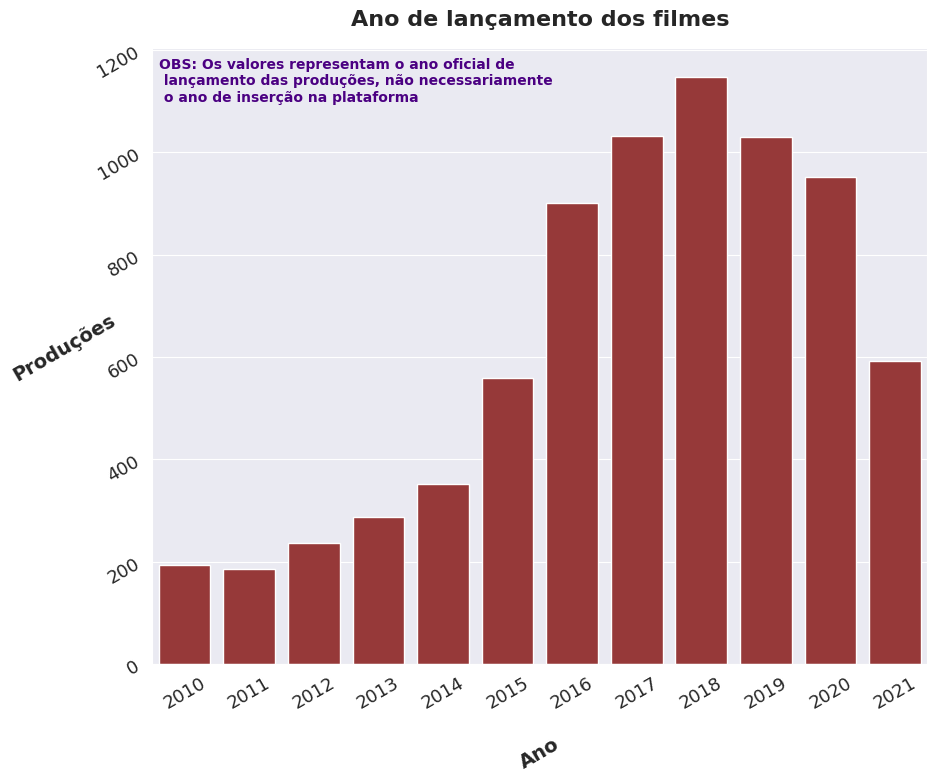

In [8]:
#Quantas produções foram lançadas por ano? (Gráfico de Barras)


sns.set_style("darkgrid")
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Ano', y = 'Filmes/Séries', data = df_production_release_year.nlargest(12, 'Filmes/Séries'), color='brown')

plt.title('Ano de lançamento dos filmes', fontsize = 16, fontweight = 'bold', pad = 16)
plt.xlabel('Ano', fontsize = 14, rotation = 30, fontweight = 'bold', labelpad = 16)
plt.ylabel('Produções', fontsize = 14, rotation = 30, fontweight = 'bold', labelpad = 18)

plt.xticks(rotation = 30, fontsize = 13)
plt.yticks(rotation = 30, fontsize = 13)

plt.annotate('OBS: Os valores representam o ano oficial de\n lançamento das produções, não necessariamente\n o ano de inserção na plataforma',
             xy=(10, 10), xytext=(-0.4, 1100),
             fontsize=10, color='indigo', fontweight='bold')

plt.show()


In [9]:
#Quantas produções foram inseridas por ano na plataforma?


plataform_added_years = list(df_netflix['date_added'])
plataform_added_years = list(map(lambda year: year[-4:] if isinstance(year, str) else None, plataform_added_years))


df_plataform_added_years = pd.DataFrame(plataform_added_years)
df_plataform_added_years = df_plataform_added_years.rename(columns = {0 : 'Ano de Adição'})
df_plataform_added_years = df_plataform_added_years.groupby(['Ano de Adição'])['Ano de Adição'].count()
df_plataform_added_years = df_plataform_added_years.reset_index(name = 'Produções Adicionadas')


df_plataform_added_years


,Ano de Adição,Produções Adicionadas
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,429
9,2017,1188


In [10]:
#Quais os países com mais participações em produções lançadas na Netflix?


df_netflix_countries = df_netflix['country']

counter_value = 1
country_list = []


while counter_value < 8808:
    df_netflix_country_register = df_netflix_countries.loc[counter_value-1]
    if type(df_netflix_country_register) != float:
        df_netflix_country_register = df_netflix_country_register.split(sep = ', ')
        df_netflix_country_register = df_netflix_country_register
    country_list.append(df_netflix_country_register)
    counter_value += 1


country_list = simple_list(country_list)

df_netflix_countries = pd.DataFrame(country_list)
df_netflix_countries = df_netflix_countries.rename(columns={0: 'País'})

df_netflix_release_per_country = df_netflix_countries.groupby('País')['País'].count()
df_netflix_release_per_country = df_netflix_release_per_country.reset_index(name = 'Produções')
df_netflix_release_per_country = df_netflix_release_per_country.sort_values('Produções', ascending = False)


df_netflix_release_per_country.head(10)


,País,Produções
119,United States,3689
47,India,1046
117,United Kingdom,804
22,Canada,445
38,France,393
55,Japan,318
105,Spain,232
103,South Korea,231
40,Germany,226
69,Mexico,169


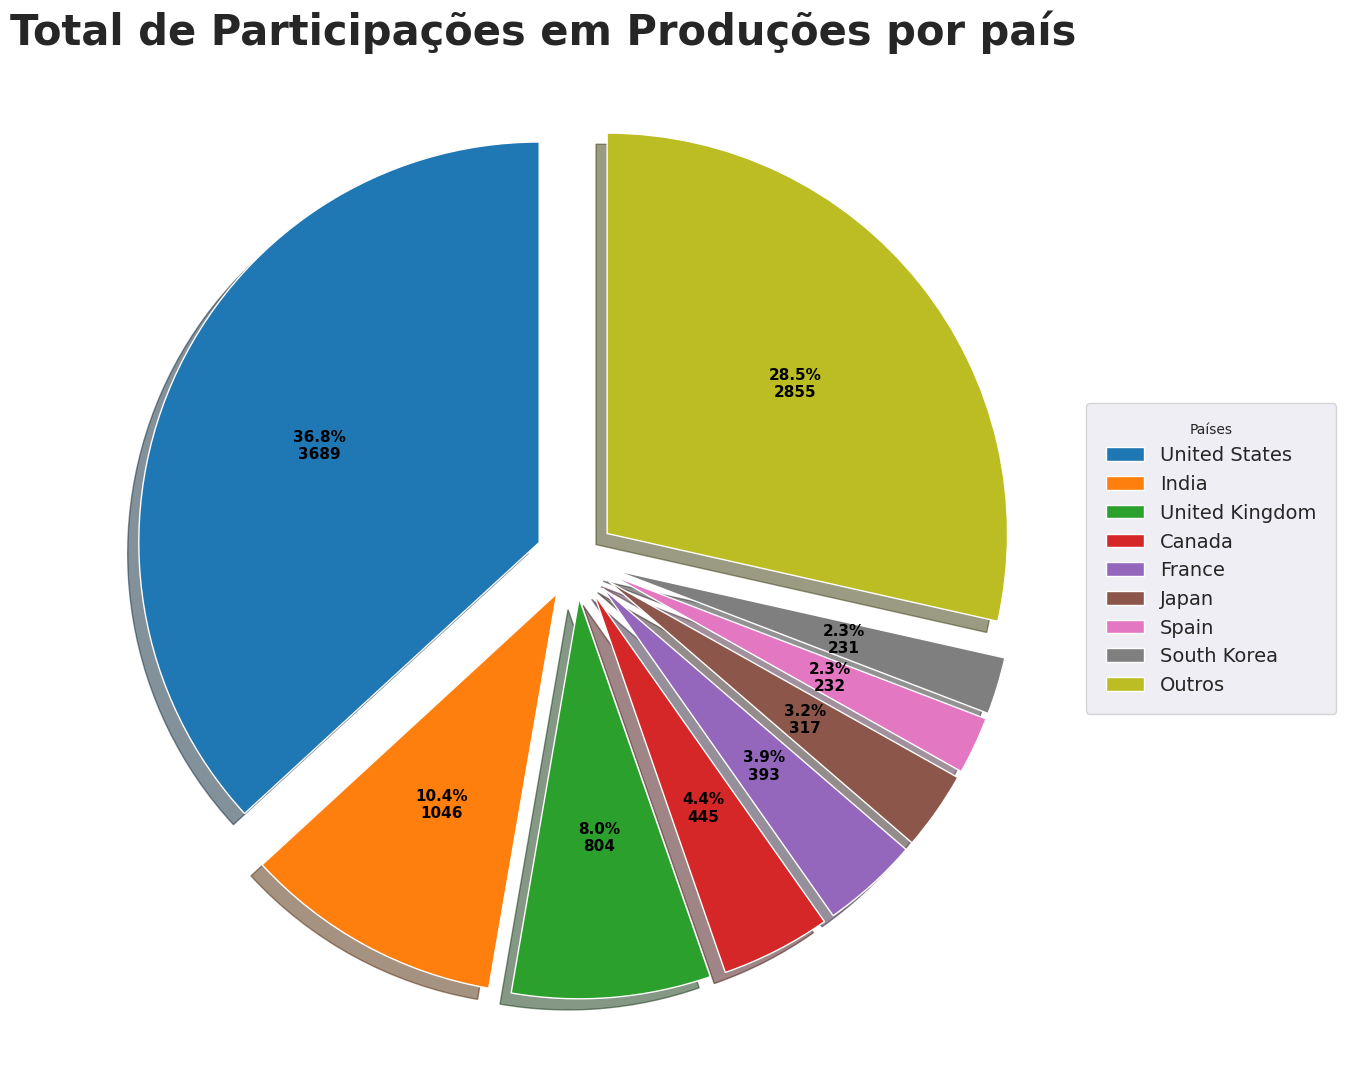

In [11]:
#Quais os países com mais participações em produções lançadas na Netflix? (Gráfico de Pizza)


productions = [df_netflix_release_per_country.loc[119]['Produções'],
               df_netflix_release_per_country.loc[47]['Produções'],
               df_netflix_release_per_country.loc[117]['Produções'],
               df_netflix_release_per_country.loc[22]['Produções'],
               df_netflix_release_per_country.loc[38]['Produções'],
               df_netflix_release_per_country.loc[55]['Produções'],
               df_netflix_release_per_country.loc[105]['Produções'],
               df_netflix_release_per_country.loc[103]['Produções']]

countries_labels = [df_netflix_release_per_country.loc[119]['País'],
                    df_netflix_release_per_country.loc[47]['País'],
                    df_netflix_release_per_country.loc[117]['País'],
                    df_netflix_release_per_country.loc[22]['País'],
                    df_netflix_release_per_country.loc[38]['País'],
                    df_netflix_release_per_country.loc[55]['País'],
                    df_netflix_release_per_country.loc[105]['País'],
                    df_netflix_release_per_country.loc[103]['País']]

all_productions = df_netflix_release_per_country.sum()['Produções']

others = df_netflix_release_per_country.sum()['Produções'] - sum(productions)

productions.append(others)
countries_labels.append('Outros')
tuple(productions)
tuple(countries_labels)

explode_values = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)


fig, ax = plt.subplots(figsize = (16, 13))
wedges, texts, autotexts = ax.pie(x = productions,
                                  autopct = lambda percentage: percentage_calc(percentage, all_productions),
                                  explode = explode_values,
                                  shadow = True,
                                  startangle = 90,
                                  textprops = dict(color = "black"))

ax.legend(wedges,
          countries_labels,
          title = "Países",
          loc = "center left",
          fontsize = 14,
          borderpad = 1,
          bbox_to_anchor = (1, 0, 0.5, 1))

plt.setp(autotexts, size = 11, weight = "bold")
ax.set_title("Total de Participações em Produções por país", fontsize = 30, fontweight = 'bold', pad = 10, loc = 'right')


plt.show()